### 1. K-Means clustering with real data:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings


#### 1.1. Load the 'Iris' dataset from Seaborn:

In [3]:
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])                        # Only X variables.
Y = df['species']                                       # Only Y variable.
header_X = X.columns                                    # Store the column names of X.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1.2. Apply k-means:

In [7]:
kmeans = KMeans(n_init=10,n_clusters=3, random_state=123)         # kmeans object for 3 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X)
res = pd.Series(kmeans.labels_)

In [8]:
res

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Length: 150, dtype: int32

In [9]:
case0 = Y[res==0]
print(case0.value_counts())

virginica     36
versicolor     2
Name: species, dtype: int64


In [10]:
case1 = Y[res==1]

In [11]:
case2 = Y[res==2]

In [12]:
# A list that contains the learned labels.
learnedLabels = ['Virginica','Setosa','Versicolor']

In [13]:
# Print out the cluster centers (centroids).
np.round(pd.DataFrame(kmeans.cluster_centers_,columns=header_X,index=['Cluster 0','Cluster 1','Cluster 2']),2)

,sepal_length,sepal_width,petal_length,petal_width
Cluster 0,6.85,3.07,5.74,2.07
Cluster 1,5.01,3.43,1.46,0.25
Cluster 2,5.90,2.75,4.39,1.43


#### 1.3. Visualize:

In [14]:
# Visualize the labeling content of the cluster 0. 
sns.countplot(case0).set_title('Cluster 0')
plt.show()

KeyError: 0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


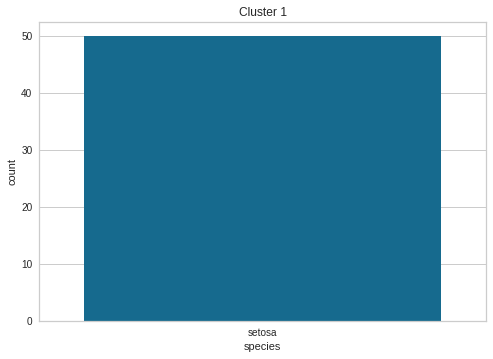

In [ ]:
# Visualize the labeling content of the cluster 1. 
sns.countplot(case1).set_title('Cluster 1')
plt.show()

#### 1.4. Prediction based on what we have learned:

In [15]:
# For a given observation of X, predict the species from what we have learned. 
# Case #1.
X_test = {'sepal_length': [7.0] ,'sepal_width': [3.0] , 'petal_length': [5.0]  ,'petal_width': [1.5] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 0 with the most probable label 'Virginica'


In [16]:
# Case #2.
X_test = {'sepal_length': [4.5] ,'sepal_width': [3.0] , 'petal_length': [1.0]  ,'petal_width': [1.0] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 1 with the most probable label 'Setosa'


In [17]:
# Case #3.
X_test = {'sepal_length': [6.0] ,'sepal_width': [3.0] , 'petal_length': [4.0]  ,'petal_width': [1.0] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 2 with the most probable label 'Versicolor'


# Find Best K

## Elbow Method for K means

/Users/alfahwun/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alfahwun/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alfahwun/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alfahwun/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

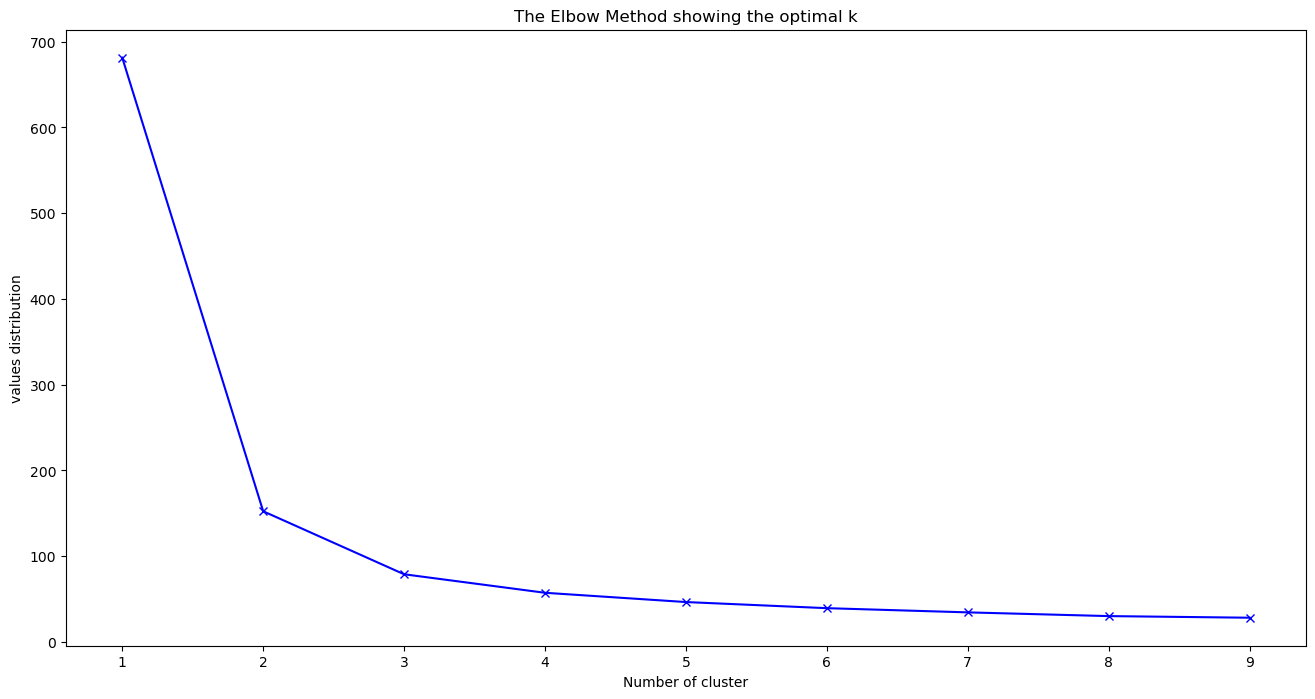

In [18]:
kMeansTab = []
ran = range(1,10)
for k in ran:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    kMeansTab.append(kmeanModel.inertia_)
#Plotting K-Means
plt.figure(figsize=(16,8))
plt.plot(ran, kMeansTab, 'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('values distribution')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### 1. Compare clustering algorithms:

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

#### 1.1. Generate simulated data and visualize:

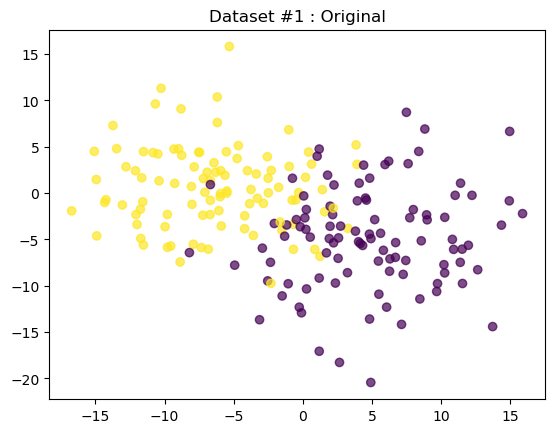

In [20]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7)
plt.title('Dataset #1 : Original')
plt.show()

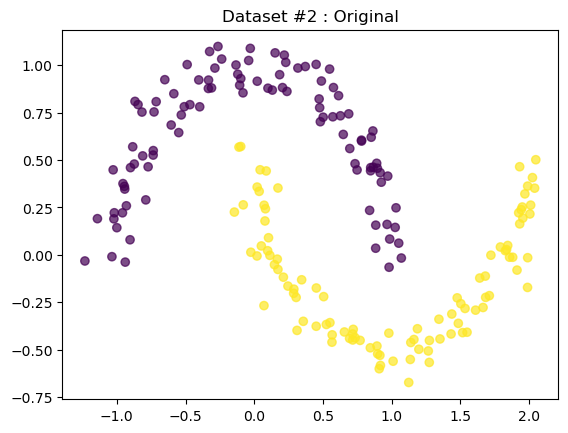

In [22]:
# Dataset #2.
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

#### 1.2. Apply k-means clustering and visualize:

/Users/alfahwun/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


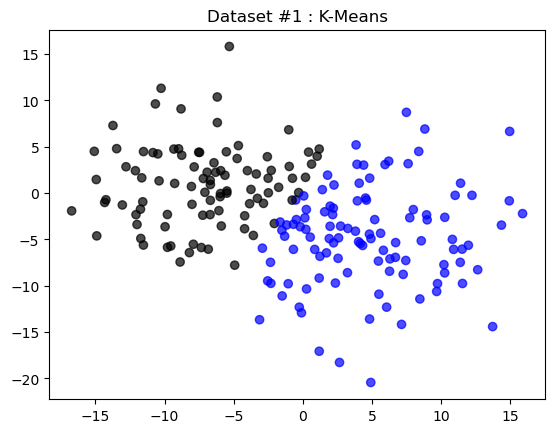

In [23]:
# Dataset #1 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=33)                 # kmeans object for 2 clusters.  .
kmeans.fit(X1)                                                 # Unsupervised learning => Only X1.    
myColors = {0:'blue',1:'black'}                                  
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )    
plt.title('Dataset #1 : K-Means')
plt.show()

In [24]:
X2[:,0]

array([-0.04070454,  0.28800507,  0.47173047,  1.009845  ,  0.8507055 ,
       -0.14470027,  1.83517698, -0.09808027,  1.34322155,  1.27402868,
       -0.73470739,  1.87995407,  1.98768929,  1.93081676,  0.02087264,
        0.61320593,  0.88368311,  1.72118217,  0.21174364,  0.78047068,
        1.6400517 , -0.93033289,  1.51550412,  1.53303978,  0.45145566,
       -0.86744591,  1.7902889 ,  0.57141379,  0.89755936, -0.10618244,
       -0.81157188, -1.14087505,  1.85709994,  0.17216064, -0.90043108,
        0.52432861,  1.82582689,  0.716163  , -0.90352327,  0.65566309,
        0.86282165,  0.91380379,  0.10361716,  0.50124185,  0.69474271,
        1.60977397,  0.20566102, -0.11128028,  1.12360775, -0.60426951,
        1.98874027,  0.0812182 ,  0.22912671,  0.16745383,  1.94950472,
        1.35091853,  0.92411821,  1.91121186, -0.73544634, -0.48805701,
       -0.94458585,  0.035804  ,  0.07795499,  0.84421392,  1.03103212,
        0.90892418,  1.1611876 , -0.94211771,  0.37132638, -0.50

/Users/alfahwun/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


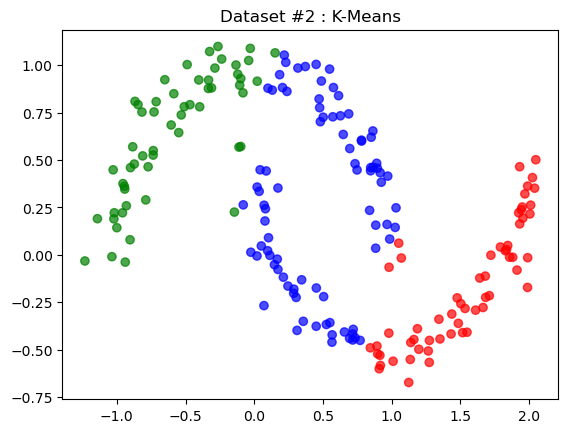

In [25]:
# Dataset #2 with three clusters.
kmeans = KMeans(n_clusters=3,random_state=33)                 
kmeans.fit(X2)                                                     
myColors = {0:'red',1:'green',2:'blue'}                                 
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : K-Means')
plt.show()

In [26]:

label_0 = [[X2 == 0]]
label_1 = X2[X2 == 1]
label_2 = X2[X2 == 2]

In [27]:
predict = kmeans.predict(X2)

#### 1.3. Apply agglomerative clustering and visualize:

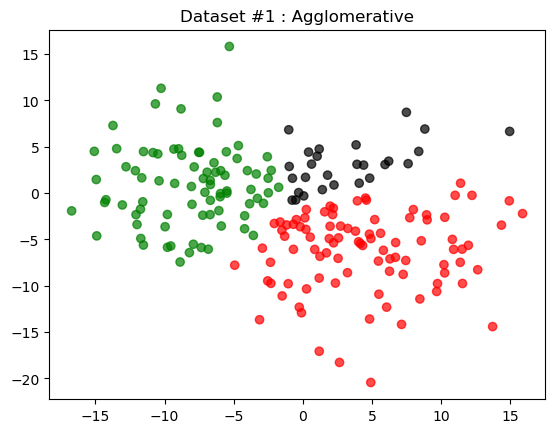

In [28]:
# Dataset #1 and two clusters.
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(X1)
myColors = {0:'red',1:'green',2:'black'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : Agglomerative')
plt.show()

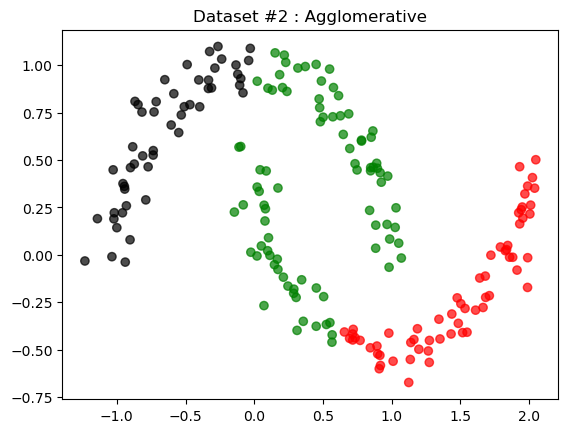

In [29]:
# Dataset #2 and two clusters.
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(X2)
myColors = {0:'red',1:'green',2:'black'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Agglomerative')
plt.show()

#### 1.4. Apply hierarchical clustering and visualize: 

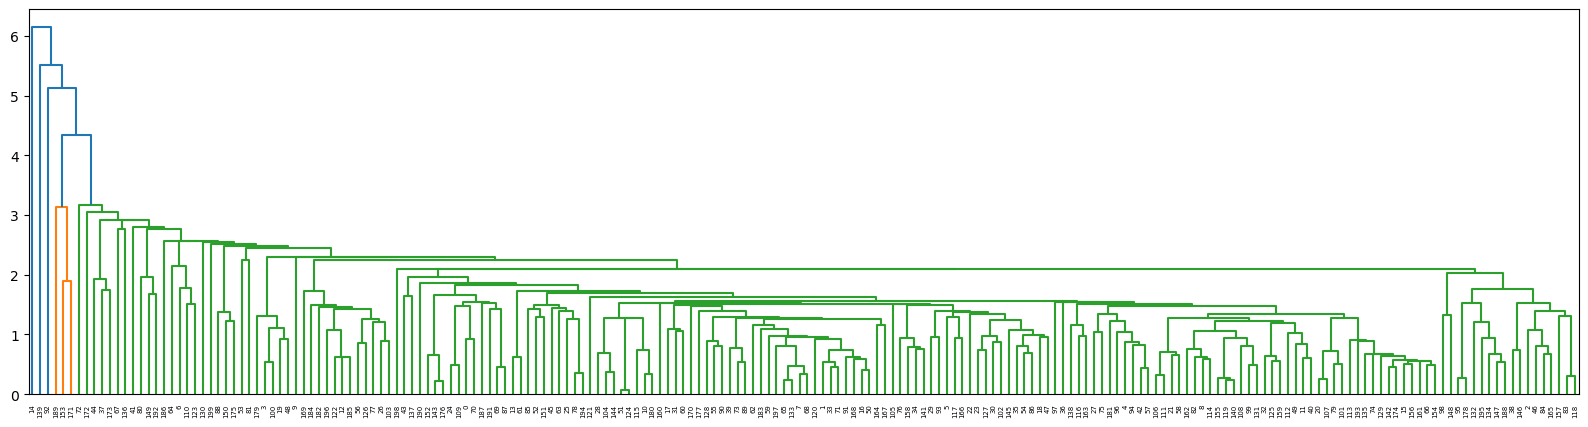

In [30]:
# Dataset #1 and show dendrogram.
myLinkage = linkage(X1,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [31]:
# Dataset #1 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 5, criterion='distance')                      #  Cut at the height (distance) = 5 <= change this value at will.
pd.Series(labels).value_counts()

1    197
4      1
2      1
3      1
dtype: int64

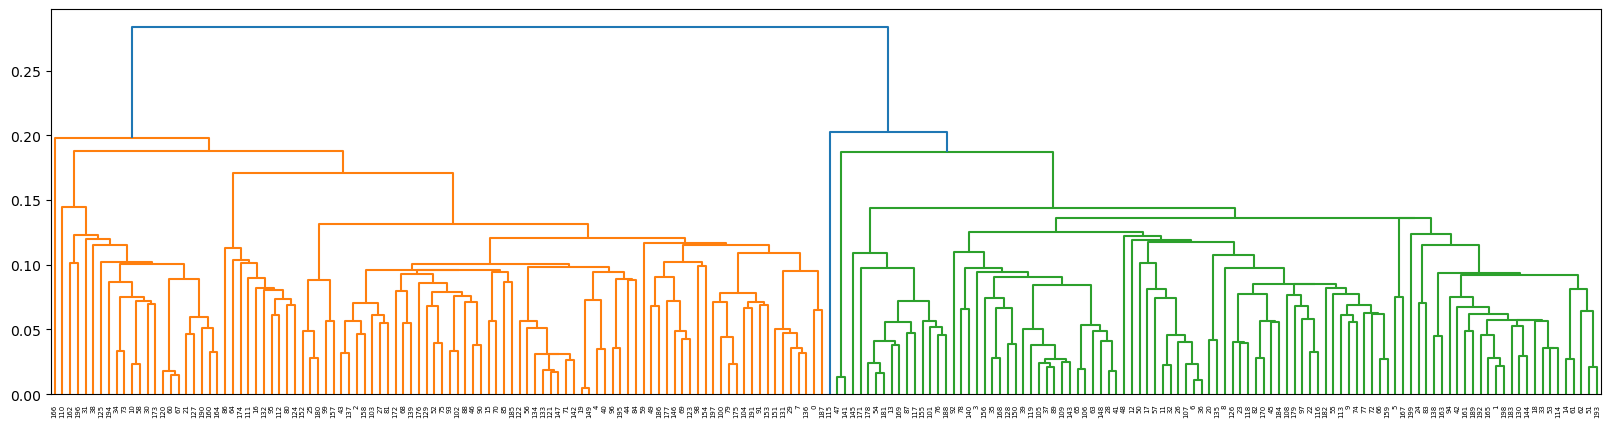

In [32]:
# Dataset #2 and show dendrogram.
myLinkage = linkage(X2,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [33]:
# Dataset #2 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 0.23, criterion='distance')                      #  Cut at the height (distance) = 0.23 <= change this value at will.
pd.Series(labels).value_counts()

1    100
2    100
dtype: int64

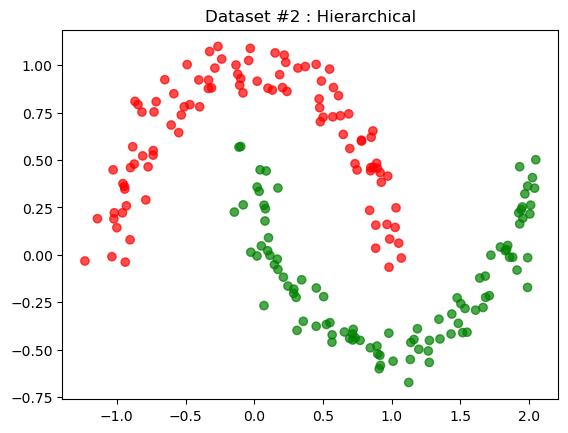

In [34]:
myColors = {1:'red',2:'green'}                                                # Define a color palette: 1~2.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Hierarchical')
plt.show()

#### 1.5. Apply DBSCAN and visualize: 

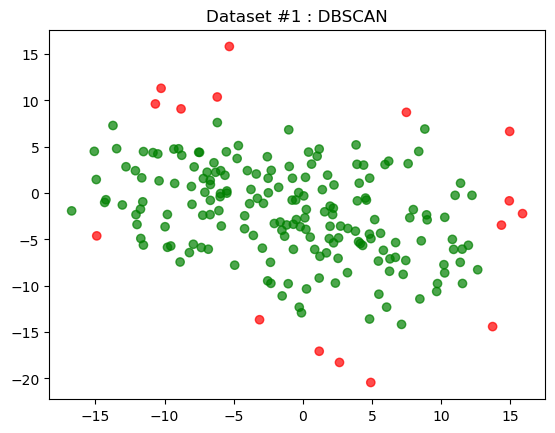

In [35]:
# Dataset #1.
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1.  Red = -1 = outlier.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : DBSCAN')
plt.show()

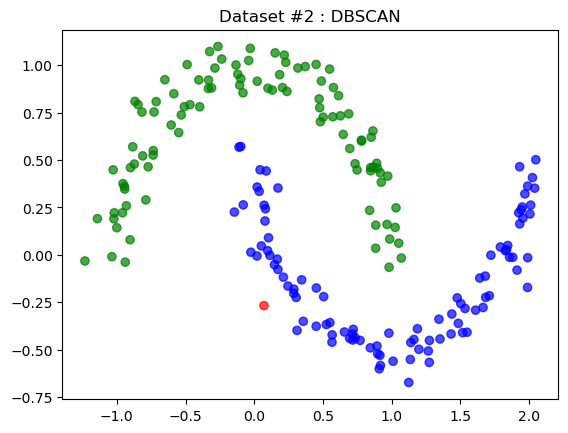

In [36]:
# Dataset #2.
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1. Red = -1 = outlier.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : DBSCAN')
plt.show()

In [37]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(X2)


DBSCAN(eps=0.2, min_samples=10)

In [38]:
dbscan.labels_

array([ 0,  1,  0,  1,  0, -1,  2,  0,  1,  1,  3,  2,  2,  2,  1,  0, -1,
        1,  1,  0,  1,  3,  1,  1,  1, -1,  2,  0,  1,  0,  3,  3,  2,  1,
        3,  1,  2,  1,  3,  1,  0,  1,  1,  0,  0,  1,  0, -1,  1,  0,  2,
        1,  0,  1,  2,  1,  0,  2,  3,  0,  3,  1,  1,  1,  0,  1,  1,  3,
        0,  0,  0,  0,  1,  3,  1,  0,  2,  1,  1,  0, -1,  0,  1,  1,  0,
        0, -1,  2,  0,  1,  0,  0,  1,  0,  1, -1,  0,  1,  0,  0,  0,  2,
        0,  0,  0,  1,  1,  2,  1,  1,  3,  0, -1,  1,  1, -1,  1,  2,  1,
        1,  3,  0,  0,  0, -1,  3,  1,  3,  1,  0,  1,  0, -1,  0,  0,  1,
        0,  0,  1,  0,  1, -1,  0,  1,  1,  2,  0,  0,  1,  0,  1,  0, -1,
        0,  0,  2,  1,  0,  0,  1,  3,  1, -1,  1,  3,  1, -1,  1,  1,  2,
        1,  2,  0,  3, -1,  0,  0,  0,  2,  1, -1,  2,  1,  1,  1,  0,  0,
        0,  2,  1,  3,  0,  1,  1,  3,  0,  3,  0,  1,  1])

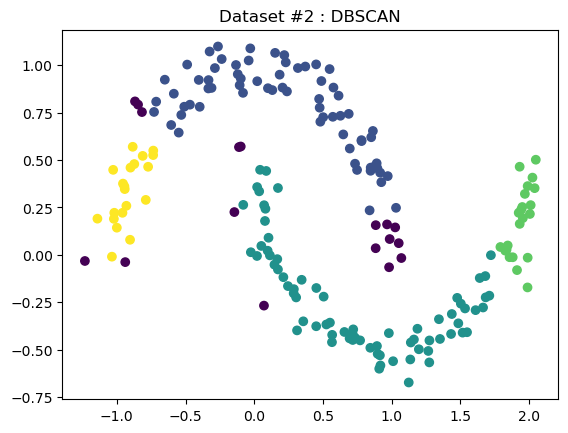

In [39]:
plt.scatter(X2[:,0],X2[:,1],c= pd.Series(dbscan.labels_) )   
plt.title('Dataset #2 : DBSCAN')
plt.show()